In [1]:
import numpy as np
import matplotlib.pyplot as plt
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

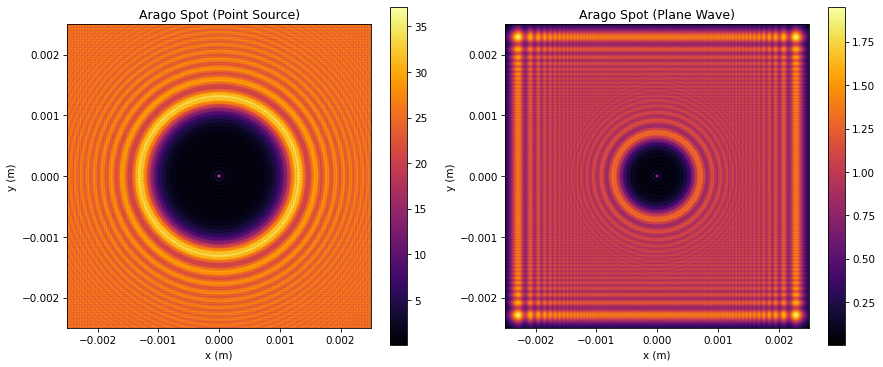

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from diffractio.scalar_fields_XY import Scalar_field_XY

# --- Simulation Parameters ---
wavelength    = 633e-9      # wavelength [m] (red light, 633 nm)
grid_size     = 5e-3        # physical size of the simulation grid [m]
N             = 1024        # number of points per axis
z_source      = 0.1         # distance from the point source to the obstacle plane [m]
z_propagation = 0.1         # propagation distance after the obstacle [m]
k             = 2 * np.pi / wavelength

# Create the transverse coordinate arrays
x = np.linspace(-grid_size/2, grid_size/2, N)
y = np.linspace(-grid_size/2, grid_size/2, N)
X, Y = np.meshgrid(x, y)

# --- Define the Obstacle ---
# We model the opaque sphere (its projection) as a circular mask.
R_sphere = 0.5e-3  # sphere radius [m]
mask = np.ones_like(X)
mask[np.sqrt(X**2 + Y**2) < R_sphere] = 0.0  # block inside the circle

# --- Part 1: Point Source (Spherical Wave) ---
# Compute the spherical wave (from a point source located at (0,0,-z_source)).
r = np.sqrt(X**2 + Y**2 + z_source**2)
U_point = np.exp(1j * k * r) / r

# Create a Scalar_field_XY instance (field defined on the XY plane at z=0).
field_point = Scalar_field_XY(x=x, y=y, wavelength=wavelength, info="Arago Spot (Point Source)")
# Set the initial field as the spherical wave modified by the obstacle.
field_point.u = U_point * mask

# Propagate the field a distance z_propagation using Rayleigh–Sommerfeld propagation.
# (RS propagates the field from z=0 to z=z_propagation.)
U_point_prop = field_point.RS(z=z_propagation)
I_point = np.abs(U_point_prop.u)**2  # intensity pattern

# --- Part 2: Plane Wave ---
# For a plane wave, the incident field is uniform.
field_plane = Scalar_field_XY(x=x, y=y, wavelength=wavelength, info="Arago Spot (Plane Wave)")
field_plane.u = np.ones_like(X)  # uniform amplitude
# Apply the same circular obstacle.
field_plane.u = field_plane.u * mask

# Propagate the plane wave field.
U_plane_prop = field_plane.RS(z=z_propagation)
I_plane = np.abs(U_plane_prop.u)**2

# --- Plotting the Results ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
im1 = axs[0].imshow(I_point, cmap='inferno', extent=[x[0], x[-1], y[0], y[-1]])
axs[0].set_title("Arago Spot (Point Source)")
axs[0].set_xlabel("x (m)")
axs[0].set_ylabel("y (m)")
fig.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(I_plane, cmap='inferno', extent=[x[0], x[-1], y[0], y[-1]])
axs[1].set_title("Arago Spot (Plane Wave)")
axs[1].set_xlabel("x (m)")
axs[1].set_ylabel("y (m)")
fig.colorbar(im2, ax=axs[1])

plt.tight_layout()
plt.show()


(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1f116c1a450>)

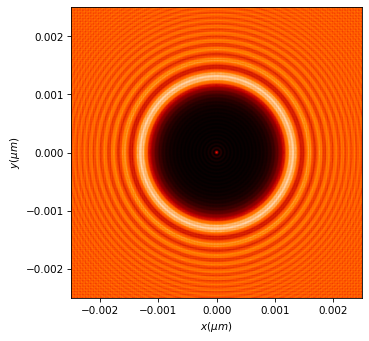

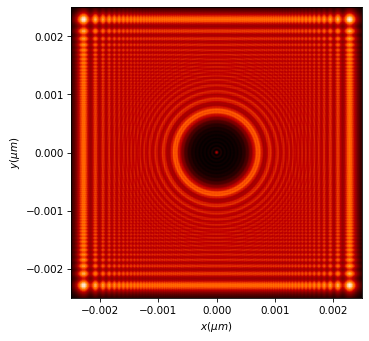

In [3]:
import numpy as np
from diffractio.scalar_fields_XY import Scalar_field_XY

# --- Simulation parameters ---
wavelength    = 633e-9      # wavelength [m]
grid_size     = 5e-3        # physical grid size [m]
N             = 1024        # grid resolution (points per axis)
z_source      = 0.1         # distance from point source to obstacle [m]
z_propagation = 0.1         # propagation distance after obstacle [m]
k             = 2 * np.pi / wavelength

# Create coordinate arrays for the XY plane
x = np.linspace(-grid_size/2, grid_size/2, N)
y = np.linspace(-grid_size/2, grid_size/2, N)
X, Y = np.meshgrid(x, y)

# --- Define the circular obstacle mask ---
R_sphere = 0.5e-3  # radius of the sphere [m]
mask = np.ones_like(X)
mask[np.sqrt(X**2 + Y**2) < R_sphere] = 0.0  # block inside the circle

# --- Part 1: Point source (spherical wave) ---
# Compute the spherical wave (point source located at (0,0,-z_source))
r = np.sqrt(X**2 + Y**2 + z_source**2)
U_point = np.exp(1j * k * r) / r

# Create a Diffractio XY field and set its initial field
field_point = Scalar_field_XY(x=x, y=y, wavelength=wavelength, info="Arago Spot (Point Source)")
field_point.u = U_point * mask

# Propagate using the RS method from z=0 to z=z_propagation
prop_field_point = field_point.RS(z=z_propagation)
# Use Diffractio's built-in draw() to display the intensity
prop_field_point.draw(kind="intensity")

# --- Part 2: Plane wave ---
# Create a plane wave (uniform amplitude) and apply the same mask
field_plane = Scalar_field_XY(x=x, y=y, wavelength=wavelength, info="Arago Spot (Plane Wave)")
field_plane.u = np.ones_like(X) * mask

# Propagate the plane wave field
prop_field_plane = field_plane.RS(z=z_propagation)
# Draw the propagated plane wave intensity using .draw()
prop_field_plane.draw(kind="intensity")


(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1f116b2bf10>)

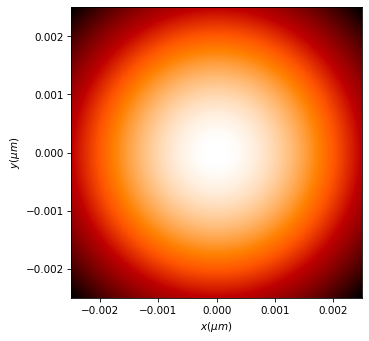

In [4]:
import numpy as np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

# --- Simulation Parameters ---
wavelength = 633e-9       # [m] (red light)
grid_size  = 5e-3         # [m] extent in x and y
N          = 128         # points in x and y
z_source   = 0.1          # [m] distance from point source to z=0 plane
z_total    = 0.2          # [m] total propagation distance along z
Nz         = 256          # number of z-slices
k          = 2 * np.pi / wavelength

# --- Create the XY grid (z = 0) ---
x = np.linspace(-grid_size/2, grid_size/2, N)
y = np.linspace(-grid_size/2, grid_size/2, N)
X, Y = np.meshgrid(x, y)

# --- Build the initial field on z = 0 as a Scalar_field_XY ---
# Spherical wave from a point source at (0,0,-z_source)
r = np.sqrt(X**2 + Y**2 + z_source**2)
u0 = np.exp(1j * k * r) / r
field_xy = Scalar_field_XY(x=x, y=y, wavelength=wavelength, info="Initial XY Field")
field_xy.u = u0

# --- Convert the XY field to a 3D volume ---
z = np.linspace(0, z_total, Nz)
# Create an empty Scalar_field_XYZ instance
field_xyz = Scalar_field_XYZ(x=x, y=y, z=z, wavelength=wavelength, info="3D Field")
# Lift the XY field into 3D (here we replicate the same XY field along z)
# (This is a simple method; a more rigorous propagation could be applied slice by slice)
field_xyz.u = np.repeat(field_xy.u[:, :, np.newaxis], Nz, axis=2)
field_xyz.u0 = field_xy

# --- Define a 3D spherical obstacle ---
R_sphere = 0.5e-3         # sphere radius [m]
z_center = z_total / 2    # center of sphere along z
# Build 3D coordinate arrays
X3, Y3, Z3 = np.meshgrid(field_xyz.x, field_xyz.y, field_xyz.z, indexing='ij')
mask3 = np.ones_like(X3)
mask3[np.sqrt(X3**2 + Y3**2 + (Z3 - z_center)**2) < R_sphere] = 0.0
field_xyz.u *= mask3

# --- Extract the final XY slice at z = z_total ---
final_xy = field_xyz.to_Scalar_field_XY(iz0=Nz - 1, is_class=True, matrix=False)

# --- Draw the intensity using Diffractio's .draw() method ---
final_xy.draw(kind="intensity")


Performing rigorous RS propagation ...
- Needs denser sampling: factor 0.01

- Needs denser sampling: factor 0.01

- Needs denser sampling: factor 0.02

- Needs denser sampling: factor 0.03

- Needs denser sampling: factor 0.04

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.06

- Needs denser sampling: factor 0.07

- Needs denser sampling: factor 0.08

- Needs denser sampling: factor 0.09

- Needs denser sampling: factor 0.10

- Needs denser sampling: factor 0.11

- Needs denser sampling: factor 0.12

- Needs denser sampling: factor 0.13

- Needs denser sampling: factor 0.14

- Needs denser sampling: factor 0.15

- Needs denser sampling: factor 0.16

- Needs denser sampling: factor 0.17

- Needs denser sampling: factor 0.18

- Needs denser sampling: factor 0.20

- Needs denser sampling: factor 0.21

- Needs denser sampling: factor 0.22

- Needs denser sampling: factor 0.23

- Needs denser sampling: factor 0.24

- Needs denser sampling: factor 0.25

- Needs den

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1f1181d1950>)

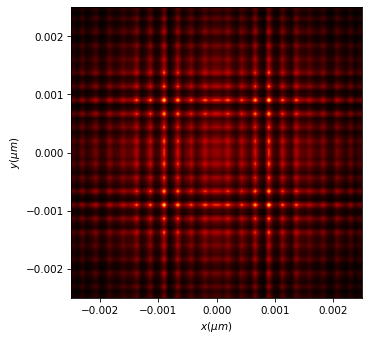

In [ ]:
import numpy as np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

# --- Simulation Parameters ---
wavelength = 633e-9       # [m] (red light, 633 nm)
grid_size  = 5e-3         # [m] extent in x and y
N          = 64         # number of points in x and y
z_source   = 0.1          # [m] distance from the point source to the z=0 plane
z_total    = 0.2          # [m] total propagation distance along z
Nz         = 32          # number of z-slices for propagation
k          = 2 * np.pi / wavelength

# --- Create the XY grid (at z = 0) ---
x = np.linspace(-grid_size/2, grid_size/2, N)
y = np.linspace(-grid_size/2, grid_size/2, N)
X, Y = np.meshgrid(x, y)

# --- Build the initial field on z = 0 as a Scalar_field_XY ---
# Compute the spherical wave from a point source at (0,0,-z_source)
r = np.sqrt(X**2 + Y**2 + z_source**2)
u0 = np.exp(1j * k * r) / r  # spherical wave amplitude on z = 0
field_xy = Scalar_field_XY(x=x, y=y, wavelength=wavelength, info="Initial XY Field")
field_xy.u = u0

# --- Create a Scalar_field_XYZ object for rigorous propagation ---
z = np.linspace(0, z_total, Nz)
field_xyz = Scalar_field_XYZ(x=x, y=y, z=z, wavelength=wavelength, info="3D Propagated Field")
# Set the initial XY field (at z=0) for the propagation
field_xyz.u0 = field_xy

# --- Perform rigorous RS propagation along z ---
# This will compute the field slice-by-slice from z = 0 to z_total.
# (Set num_processors > 1 to parallelize if desired.)
print("Performing rigorous RS propagation ...")
field_xyz.RS(num_processors=1, verbose=True)
field_xyz.PWD(num_processors=1, verbose=True)
field_xyz.BPM(num_processors=1, verbose=True)
field_xyz.WPM(num_processors=1, verbose=True)
field_xyz.CZT(num_processors=1, verbose=True)

# --- Apply a 3D spherical obstacle (mask) ---
R_sphere = 0.5e-3         # sphere radius [m]
z_center = z_total / 2    # center the sphere along z
# Create 3D coordinate arrays (using 'ij' indexing so the array shape is [len(x), len(y), len(z)])
X3, Y3, Z3 = np.meshgrid(field_xyz.x, field_xyz.y, field_xyz.z, indexing='ij')
mask3 = np.ones_like(X3)
mask3[np.sqrt(X3**2 + Y3**2 + (Z3 - z_center)**2) < R_sphere] = 0.0
field_xyz.u *= mask3

# --- Extract the final XY slice at z = z_total and draw the intensity ---
final_xy = field_xyz.to_Scalar_field_XY(iz0=Nz - 1, is_class=True, matrix=False)
final_xy.draw(kind="intensity")


(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1f12718ec90>)

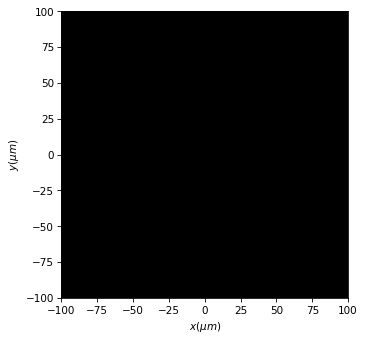

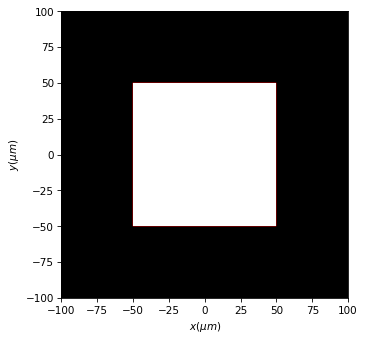

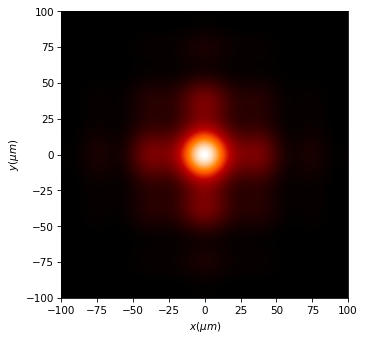

In [ ]:
from diffractio import np
from diffractio import um, mm, degrees, nm
from diffractio.diffractio import Diffractio

x = np.linspace(-100 * um, 100 * um, 512)
y = np.linspace(-100 * um, 100 * um, 512)
wavelength = 0.6328 * um

u0 = Diffractio("scalar", "source", x=x, y=y, z=None, wavelength=wavelength, info='source')
u0.plane_wave()

t = Diffractio("scalar", "mask", x=x, y=y, z=None, wavelength=wavelength, info='mask')
t.square(r0=(0,0), size=100*um, angle=0*degrees)

u0.draw()
t.draw()
u1 = u0 * t
u2 = u1.RS(z=5*mm, new_field=True)
u2.draw()

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs denser sampling: factor 0.05

- Needs dens

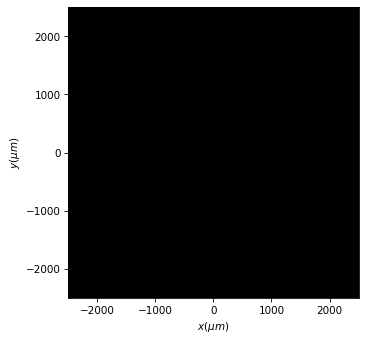

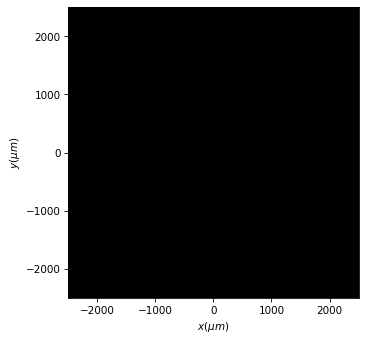

In [16]:
from diffractio import degrees, eps, mm, no_date, np, um
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

x0 = np.linspace(-2.5*mm, 2.5*mm, 512)
y0 = np.linspace(-2.5*mm, 2.5*mm, 512)
z0 = np.linspace(1*um, 50*mm, 1024)
wavelength = .6328*um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0*um, 0*um), radius=(10*mm, 10*mm), angle=0*degrees
    )
t1.inverse_amplitude()
t1.draw()

uxyz = Scalar_mask_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(u0=t1)

uxyz.RS(verbose=True, num_processors=1)

uxyz.draw_XY()

time in RS= 8.926597595214844. num proc= 1


<Figure size 480x360 with 0 Axes>

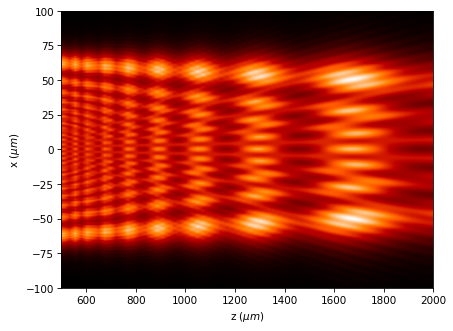

In [17]:
wavelength = 0.5 * um
x0 = np.linspace(-100 * um, 100 * um, 256)
y0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(500 * um, 2 * mm, 64)

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info="u0")
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info="t0")
t0.square(r0=(0 * um, 0 * um), size=150 * um, angle=0 * degrees)

u1 = t0 * u0

uz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uz.incident_field(u1)
uz.RS(verbose=True)
uz.draw_XZ(kind="intensity")

Time = 12.17 s, time/loop = 47.54 ms


<Figure size 480x360 with 0 Axes>

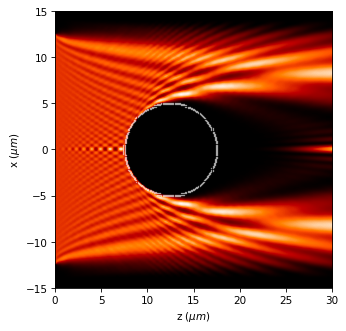

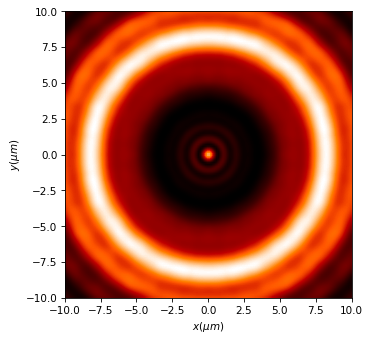

In [36]:
x = np.linspace(-15 * um, 15 * um, 256)
y = np.linspace(-15 * um, 15 * um, 256)
z = np.linspace(0, 30 * um, 256)
wavelength = 0.6328 * um

t0 = Scalar_mask_XY(x, y, wavelength)
t0.circle(r0=(0 * um, 0 * um), radius=12.5 * um, angle=0)

u0 = Scalar_source_XY(x, y, wavelength)
u0.plane_wave(A=1)

u = Scalar_mask_XYZ(x, y, z, wavelength,  info="mask",)
u.sphere(r0=(0, 0, 12.5), radius=5 * um, refractive_index=1E100j)

u.incident_field(u0=u0 * t0)

# u.draw_XYZ(kind='refractive_index', drawing='projections')
u.clear_field()
u.WPM(verbose=True,has_edges=True)
u.draw_XZ(y0=0, logarithm=True, scale="scaled", draw_borders=True)
u2 = u.cut_resample([-10, 10], [-10, 10], num_points=(128, 128, 128), new_field=True)
u2.draw_XY(z0=30, logarithm=True)


In [45]:
from diffractio import np
from diffractio import um, mm, degrees, nm
from diffractio.diffractio import Diffractio

sphere_radius = 0.05 * mm
# beam_radius = 0.75 * mm
beam_radius = 1.5 * sphere_radius
area_width = 2 * sphere_radius
N = 512
wavelength = 632 * nm

x = np.linspace(-beam_radius, beam_radius, N)
y = np.linspace(-beam_radius, beam_radius, N)
z = np.linspace(0, 6 * sphere_radius, 2 * N)

t0 = Scalar_mask_XY(x, y, wavelength)
t0.circle(r0=(0 * um, 0 * um), radius=beam_radius, angle=0)

u0 = Scalar_source_XY(x, y, wavelength)
u0.plane_wave(A=1)

u = Scalar_mask_XYZ(x, y, z, wavelength,  info="mask",)
u.sphere(r0=(0, 0, 2*sphere_radius), radius=sphere_radius, refractive_index=1E100j)

u.incident_field(u0=u0 * t0)

# u.draw_XYZ(kind='refractive_index', drawing='projections')
u.clear_field()
u.WPM(verbose=True,has_edges=True)
u.draw_XZ(y0=0, logarithm=True, scale="scaled", draw_borders=True)
u2 = u.cut_resample([-2*sphere_radius, 2*sphere_radius], [-2*sphere_radius, 2*sphere_radius], num_points=(N,N,N), new_field=True)
u2.draw_XY(z0=5.5*sphere_radius, logarithm=True)


MemoryError: Unable to allocate 4.00 GiB for an array with shape (512, 512, 1024) and data type complex128